In [ ]:
Aimport numpy as np
import pandas as pd

In [ ]:
!gdown --id 12U3D4BItNHIcGdoA7SEZ-cDOLE7ZwwSV
!gdown --id 1NLYnxS-fa8uiAWeyWC0xe_j2UONaZZgi

In [ ]:
data_train = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')

In [ ]:
def preproc(data):
    data.DS_TIPO_INTERNACAO = data.DS_TIPO_INTERNACAO.fillna('0')
    data.DS_TIPO_ACOMODACAO = data.DS_TIPO_ACOMODACAO.fillna('0')
    data.DS_TIPO_ATENDIMENTO = data.DS_TIPO_ATENDIMENTO.fillna('0')
    data.DS_INDICACAO_ACIDENTE = data.DS_INDICACAO_ACIDENTE.fillna('0')
    data.DS_UNIDADE_TEMPO_DOENCA = data.DS_UNIDADE_TEMPO_DOENCA.fillna('0')
    data.QT_DIA_SOLICITADO = data.QT_DIA_SOLICITADO.fillna(0)
    data.QT_TEMPO_DOENCA = data.QT_TEMPO_DOENCA.fillna(0)
    data.CD_GUIA_REFERENCIA = data.CD_GUIA_REFERENCIA.fillna(0)
    data.CD_CID = data.CD_CID.notnull().mul(1)
    data.CD_CID = data.CD_CID.fillna(0)
    return data

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227122 entries, 0 to 227121
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 227122 non-null  int64  
 1   NR_SEQ_REQUISICAO          227122 non-null  int64  
 2   NR_SEQ_ITEM                227122 non-null  int64  
 3   DT_REQUISICAO              227122 non-null  int64  
 4   DS_TIPO_GUIA               227122 non-null  object 
 5   DT_NASCIMENTO              227112 non-null  float64
 6   NR_PRODUTO                 227122 non-null  int64  
 7   DS_TIPO_PREST_SOLICITANTE  227122 non-null  object 
 8   DS_CBO                     227122 non-null  object 
 9   DS_TIPO_CONSULTA           10511 non-null   object 
 10  QT_TEMPO_DOENCA            266 non-null     float64
 11  DS_UNIDADE_TEMPO_DOENCA    266 non-null     object 
 12  DS_TIPO_DOENCA             531 non-null     object 
 13  DS_INDICACAO_ACIDENTE      20

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186144 entries, 0 to 186143
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 186144 non-null  int64  
 1   NR_SEQ_REQUISICAO          186144 non-null  int64  
 2   NR_SEQ_ITEM                186144 non-null  int64  
 3   DT_REQUISICAO              186144 non-null  int64  
 4   DS_TIPO_GUIA               186144 non-null  object 
 5   DT_NASCIMENTO              186144 non-null  float64
 6   NR_PRODUTO                 186144 non-null  int64  
 7   DS_TIPO_PREST_SOLICITANTE  186144 non-null  object 
 8   DS_CBO                     186144 non-null  object 
 9   DS_TIPO_CONSULTA           5113 non-null    object 
 10  QT_TEMPO_DOENCA            37 non-null      float64
 11  DS_UNIDADE_TEMPO_DOENCA    38 non-null      object 
 12  DS_TIPO_DOENCA             439 non-null     object 
 13  DS_INDICACAO_ACIDENTE      17

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def standardScalerFunc(data):
  scaler = StandardScaler()
  scalerT = scaler.fit_transform(data)

  return scaler, pd.DataFrame(scalerT)

def oneHotEncoderFunc(data):
  enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
  encT = enc.fit_transform(data)
  
  return enc, pd.DataFrame(encT)

In [ ]:
data_train = preproc(data_train)

num = data_train[['QT_SOLICITADA', 'QT_DIA_SOLICITADO', 'QT_TEMPO_DOENCA', 'CD_GUIA_REFERENCIA']]
cat = data_train[['DS_TIPO_ACOMODACAO','CD_CID','DS_UNIDADE_TEMPO_DOENCA', 'DS_TIPO_INTERNACAO', 'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ATENDIMENTO', 'DS_INDICACAO_ACIDENTE', 'DS_TIPO_PREST_SOLICITANTE', 'DS_TIPO_GUIA', 'DS_GRUPO', 'CD_ITEM', 'DS_CBO', 'DS_SUBGRUPO']]
target = data_train['DS_STATUS_ITEM']

X = pd.concat([num, cat], axis=1)
X = X.dropna()
y = target

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler, x_train_scaler = standardScalerFunc(X_train[['QT_SOLICITADA', 'QT_DIA_SOLICITADO', 'QT_TEMPO_DOENCA', 'CD_GUIA_REFERENCIA']])
enc, x_train_enc = oneHotEncoderFunc(X_train[['DS_TIPO_ACOMODACAO','CD_CID','DS_UNIDADE_TEMPO_DOENCA', 'DS_TIPO_INTERNACAO', 'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ATENDIMENTO', 'DS_INDICACAO_ACIDENTE', 'DS_TIPO_PREST_SOLICITANTE', 'DS_TIPO_GUIA', 'DS_GRUPO']])
x_train = pd.concat([x_train_scaler, x_train_enc], axis=1)

x_test_scaler = scaler.transform(X_test[['QT_SOLICITADA', 'QT_DIA_SOLICITADO', 'QT_TEMPO_DOENCA', 'CD_GUIA_REFERENCIA']])
x_test_enc = enc.transform(X_test[['DS_TIPO_ACOMODACAO','CD_CID','DS_UNIDADE_TEMPO_DOENCA', 'DS_TIPO_INTERNACAO', 'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ATENDIMENTO', 'DS_INDICACAO_ACIDENTE', 'DS_TIPO_PREST_SOLICITANTE', 'DS_TIPO_GUIA', 'DS_GRUPO']])
x_test = pd.concat([pd.DataFrame(x_test_scaler), pd.DataFrame(x_test_enc)], axis=1)

In [ ]:
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(x_train, y_train)
yPred = clf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,yPred))
cm = (confusion_matrix(y_test,yPred))
print(classification_report(y_test,yPred))
print(accuracy_score(y_test, yPred))

[[28943  1889]
 [10747  3846]]
              precision    recall  f1-score   support

  Autorizado       0.73      0.94      0.82     30832
      Negado       0.67      0.26      0.38     14593

    accuracy                           0.72     45425
   macro avg       0.70      0.60      0.60     45425
weighted avg       0.71      0.72      0.68     45425

0.7218271876719868


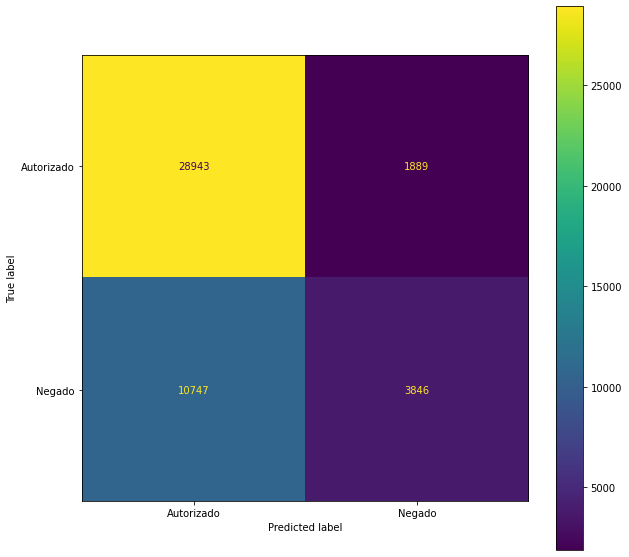

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.gcf().set_size_inches(10, 10)
plt.show()

In [ ]:
data_test_pp = preproc(data_test)
test_scaler = scaler.transform(data_test_pp[['QT_SOLICITADA', 'QT_DIA_SOLICITADO', 'QT_TEMPO_DOENCA', 'CD_GUIA_REFERENCIA']])
test_enc = enc.transform(data_test_pp[['DS_TIPO_ACOMODACAO','CD_CID','DS_UNIDADE_TEMPO_DOENCA', 'DS_TIPO_INTERNACAO', 'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ATENDIMENTO', 'DS_INDICACAO_ACIDENTE', 'DS_TIPO_PREST_SOLICITANTE', 'DS_TIPO_GUIA', 'DS_GRUPO']])

test = pd.concat([pd.DataFrame(test_scaler), pd.DataFrame(test_enc)], axis=1)

In [ ]:
pred = clf.predict(test)

In [ ]:
from itertools import zip_longest
submission = pd.DataFrame.from_records(zip_longest(data_test['Unnamed: 0'], pred), columns=['ID', 'DS_STATUS_ITEM'])

submission.set_index('ID').to_csv('submission.csv')

In [ ]:
!python --version

Python 3.8.16
